In [2]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
import string
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_auc_score, precision_score, recall_score, accuracy_score

In [4]:
import pandas as pd
dataset = pd.read_csv('C:/Users/Student/Desktop/ML WORKSHOP/IMDb_Reviews.csv')

dataset

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [5]:
dataset = dataset.sample(n = 25000, random_state = 42)  # Adjust the value of n as needed

# Reset index
dataset.reset_index(drop = True, inplace = True)

In [6]:
dataset

,review,sentiment
0,I really liked this Summerslam due to the look...,positive
1,Not many television shows appeal to quite as m...,positive
2,The film quickly gets to a major chase scene w...,negative
3,Jane Austen would definitely approve of this o...,positive
4,Expectations were somewhat high for me when I ...,negative
...,...,...
24995,More directors like Nacho Vigalondo need a gre...,positive
24996,Rita Hayworth lights up the screen in this fun...,positive
24997,"The biggest heroes, is one of the greatest mov...",positive
24998,I happened to see a promo for this movie on Sp...,negative


In [7]:
dataset.isnull().sum()

review       0
sentiment    0
dtype: int64

In [8]:
print("Number Of Duplicates:", dataset.duplicated().sum())
dataset.drop_duplicates(inplace = True)
print("Number Of Duplicates after drop:", dataset.duplicated().sum())

Number Of Duplicates: 124
Number Of Duplicates after drop: 0


sentiment
positive    12495
negative    12381
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment Distribution'}, xlabel='sentiment'>

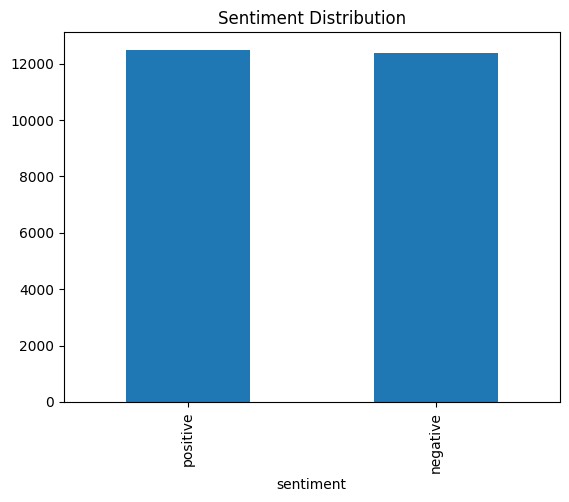

In [9]:
print(dataset['sentiment'].value_counts())
dataset['sentiment'].value_counts().plot(kind = 'bar', title = 'Sentiment Distribution')


In [10]:
dataset['review'] = dataset['review'].apply(lambda x:x.lower())

In [11]:
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'),"",raw_text)
    return cleaned_text
dataset['review'] = dataset['review'].apply(remove_tags)

In [12]:
def remove_urls(raw_text):
    cleaned_text = re.sub(r'http[s]?://\S+', '', raw_text)
    return cleaned_text

# Apply the function to your dataset
dataset['review'] = dataset['review'].apply(remove_urls)

In [13]:
def remove_punctuation(text):
    for c in string.punctuation:
        text = text.replace(c,'')
    return text
dataset['review'] = dataset['review'].apply(remove_punctuation)

In [14]:
import nltk
nltk.download('stopwords')
sw_list = stopwords.words('english')
dataset['review'] = dataset['review'].apply(
    lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Student\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
dataset

,review,sentiment
0,really liked summerslam due look arena curtain...,positive
1,many television shows appeal quite many differ...,positive
2,film quickly gets major chase scene ever incre...,negative
3,jane austen would definitely approve onegwynet...,positive
4,expectations somewhat high went see movie thou...,negative
...,...,...
24994,barely find words express utterly utterly awfu...,negative
24995,directors like nacho vigalondo need greater ou...,positive
24996,rita hayworth lights screen fun fancy delightf...,positive
24997,biggest heroes one greatest movies ever good s...,positive


In [16]:
import nltk
nltk.download('punkt')
dataset['review'] = dataset['review'].apply(lambda sentence: word_tokenize(sentence))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Student\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
dataset['review'][0]

['really',
 'liked',
 'summerslam',
 'due',
 'look',
 'arena',
 'curtains',
 'look',
 'overall',
 'interesting',
 'reason',
 'anyways',
 'could',
 'one',
 'best',
 'summerslams',
 'ever',
 'wwf',
 'didnt',
 'lex',
 'luger',
 'main',
 'event',
 'yokozuna',
 'time',
 'ok',
 'huge',
 'fat',
 'man',
 'vs',
 'strong',
 'man',
 'im',
 'glad',
 'times',
 'changed',
 'terrible',
 'main',
 'event',
 'like',
 'every',
 'match',
 'luger',
 'terrible',
 'matches',
 'card',
 'razor',
 'ramon',
 'vs',
 'ted',
 'dibiase',
 'steiner',
 'brothers',
 'vs',
 'heavenly',
 'bodies',
 'shawn',
 'michaels',
 'vs',
 'curt',
 'hening',
 'event',
 'shawn',
 'named',
 'big',
 'monster',
 'body',
 'guard',
 'diesel',
 'irs',
 'vs',
 '123',
 'kid',
 'bret',
 'hart',
 'first',
 'takes',
 'doink',
 'takes',
 'jerry',
 'lawler',
 'stuff',
 'harts',
 'lawler',
 'always',
 'interesting',
 'ludvig',
 'borga',
 'destroyed',
 'marty',
 'jannetty',
 'undertaker',
 'took',
 'giant',
 'gonzalez',
 'another',
 'terrible',
 'm

In [18]:
dataset

,review,sentiment
0,"[really, liked, summerslam, due, look, arena, ...",positive
1,"[many, television, shows, appeal, quite, many,...",positive
2,"[film, quickly, gets, major, chase, scene, eve...",negative
3,"[jane, austen, would, definitely, approve, one...",positive
4,"[expectations, somewhat, high, went, see, movi...",negative
...,...,...
24994,"[barely, find, words, express, utterly, utterl...",negative
24995,"[directors, like, nacho, vigalondo, need, grea...",positive
24996,"[rita, hayworth, lights, screen, fun, fancy, d...",positive
24997,"[biggest, heroes, one, greatest, movies, ever,...",positive


In [19]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize tokens with POS tagging
def lemmatize_with_pos(tokens):
    tagged_tokens = nltk.pos_tag(tokens)  # Perform POS tagging
    lemmatized_tokens = []
    for token, tag in tagged_tokens:
        # Convert POS tag to WordNet POS tag
        wn_tag = nltk.corpus.wordnet.NOUN
        if tag.startswith('J'):
            wn_tag = nltk.corpus.wordnet.ADJ
        elif tag.startswith('V'):
            wn_tag = nltk.corpus.wordnet.VERB
        elif tag.startswith('R'):
            wn_tag = nltk.corpus.wordnet.ADV
        # Lemmatize token with POS tag
        lemma = lemmatizer.lemmatize(token, pos=wn_tag)
        lemmatized_tokens.append(lemma)
    return lemmatized_tokens

# Apply lemmatization to your dataset column
dataset['review'] = dataset['review'].apply(lemmatize_with_pos)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Student\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Student\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [35]:
dataset

,review,sentiment
0,"[really, liked, summerslam, due, look, arena, ...",positive
1,"[many, television, show, appeal, quite, many, ...",positive
2,"[film, quickly, get, major, chase, scene, ever...",negative
3,"[jane, austen, would, definitely, approve, one...",positive
4,"[expectation, somewhat, high, go, see, movie, ...",negative
...,...,...
24994,"[barely, find, word, express, utterly, utterly...",negative
24995,"[director, like, nacho, vigalondo, need, great...",positive
24996,"[rita, hayworth, light, screen, fun, fancy, de...",positive
24997,"[big, hero, one, great, movie, ever, good, sto...",positive


In [36]:
def join(tokens):
    return ' '.join(token for token in tokens)

dataset['review'] = dataset['review'].apply(join)

In [37]:
train, test = train_test_split(dataset, test_size = 0.2, shuffle = True) # Train Split 80-20
tfidfvect = TfidfVectorizer(analyzer = "word", ngram_range = (1,2), min_df = 10, max_features = 5000)

x_train_tfidf = tfidfvect.fit_transform(train['review']).toarray()
x_test_tfidf = tfidfvect.transform(test['review']).toarray()

y_train = train['sentiment']
y_test = test['sentiment']

In [38]:
x_train_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(19900, 5000))

In [39]:
y_train


23568    positive
21784    negative
17310    positive
12148    negative
23597    positive
           ...   
24528    negative
9340     positive
24171    negative
14768    positive
14473    negative
Name: sentiment, Length: 19900, dtype: object

In [15]:
file = open("C:/Users/Student/Desktop/DAY 01/Sample.txt")
data_2 = file.read()
data_2


'Text analytics is the automated process of translating large volumes of unstructured text into quantitative data to uncover insights, trends, and patterns. Combined with data visualization tools, this technique enables companies to understand the story behind the numbers and make better decisions.'

In [16]:
import requests
import pandas as pd

# URL of the raw CSV file
url = "https://raw.githubusercontent.com/omaarelsherif/Movie-Reviews-Sentiment-Analysis-Using-Machine-Learning/main/Dataset/IMDB.csv"

# Fetch the content from the URL
response = requests.get(url)
response.raise_for_status()  # Check if the request was successful

# Save the content to a CSV file
csv_file_path = "C:/Users/Student/Desktop/DAY 01/Book1.csv"
with open(csv_file_path, 'wb') as file:
    file.write(response.content)

print(f"Data has been saved to {csv_file_path}")


Data has been saved to C:/Users/Student/Desktop/DAY 01/Book1.csv


In [18]:
import nltk
sentences = nltk.sent_tokenize(data_2)
sentences

['Text analytics is the automated process of translating large volumes of unstructured text into quantitative data to uncover insights, trends, and patterns.',
 'Combined with data visualization tools, this technique enables companies to understand the story behind the numbers and make better decisions.']

In [20]:
len(sentences)


2

In [24]:
tokens = nltk.word_tokenize(data_2)
tokens

['Text',
 'analytics',
 'is',
 'the',
 'automated',
 'process',
 'of',
 'translating',
 'large',
 'volumes',
 'of',
 'unstructured',
 'text',
 'into',
 'quantitative',
 'data',
 'to',
 'uncover',
 'insights',
 ',',
 'trends',
 ',',
 'and',
 'patterns',
 '.',
 'Combined',
 'with',
 'data',
 'visualization',
 'tools',
 ',',
 'this',
 'technique',
 'enables',
 'companies',
 'to',
 'understand',
 'the',
 'story',
 'behind',
 'the',
 'numbers',
 'and',
 'make',
 'better',
 'decisions',
 '.']

In [21]:
dataset

,review,sentiment
0,"[really, liked, summerslam, due, look, arena, ...",positive
1,"[many, television, show, appeal, quite, many, ...",positive
2,"[film, quickly, get, major, chase, scene, ever...",negative
3,"[jane, austen, would, definitely, approve, one...",positive
4,"[expectation, somewhat, high, go, see, movie, ...",negative
...,...,...
24994,"[barely, find, word, express, utterly, utterly...",negative
24995,"[director, like, nacho, vigalondo, need, great...",positive
24996,"[rita, hayworth, light, screen, fun, fancy, de...",positive
24997,"[big, hero, one, great, movie, ever, good, sto...",positive


In [22]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize tokens with POS tagging
def lemmatize_with_pos(tokens):
    tagged_tokens = nltk.pos_tag(tokens)  # Perform POS tagging
    lemmatized_tokens = []
    for token, tag in tagged_tokens:
        # Convert POS tag to WordNet POS tag
        wn_tag = nltk.corpus.wordnet.NOUN
        if tag.startswith('J'):
            wn_tag = nltk.corpus.wordnet.ADJ
        elif tag.startswith('V'):
            wn_tag = nltk.corpus.wordnet.VERB
        elif tag.startswith('R'):
            wn_tag = nltk.corpus.wordnet.ADV
        # Lemmatize token with POS tag
        lemma = lemmatizer.lemmatize(token, pos=wn_tag)
        lemmatized_tokens.append(lemma)
    return lemmatized_tokens

# Apply lemmatization to your dataset column
dataset['review'] = dataset['review'].apply(lemmatize_with_pos)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Student\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Student\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
dataset

,review,sentiment
0,"[really, liked, summerslam, due, look, arena, ...",positive
1,"[many, television, show, appeal, quite, many, ...",positive
2,"[film, quickly, get, major, chase, scene, ever...",negative
3,"[jane, austen, would, definitely, approve, one...",positive
4,"[expectation, somewhat, high, go, see, movie, ...",negative
...,...,...
24994,"[barely, find, word, express, utterly, utterly...",negative
24995,"[director, like, nacho, vigalondo, need, great...",positive
24996,"[rita, hayworth, light, screen, fun, fancy, de...",positive
24997,"[big, hero, one, great, movie, ever, good, sto...",positive


In [24]:
def join(tokens):
    return ' '.join(token for token in tokens)

dataset['review'] = dataset['review'].apply(join)

In [25]:
dataset

,review,sentiment
0,really liked summerslam due look arena curtain...,positive
1,many television show appeal quite many differe...,positive
2,film quickly get major chase scene ever increa...,negative
3,jane austen would definitely approve onegwynet...,positive
4,expectation somewhat high go see movie think s...,negative
...,...,...
24994,barely find word express utterly utterly awful...,negative
24995,director like nacho vigalondo need great outle...,positive
24996,rita hayworth light screen fun fancy delightfu...,positive
24997,big hero one great movie ever good story great...,positive


In [26]:
train, test = train_test_split(dataset, test_size = 0.2, shuffle = True) # Train Split 80-20
tfidfvect = TfidfVectorizer(analyzer = "word", ngram_range = (1,2), min_df = 10, max_features = 5000)

x_train_tfidf = tfidfvect.fit_transform(train['review']).toarray()
x_test_tfidf = tfidfvect.transform(test['review']).toarray()

y_train = train['sentiment']
y_test = test['sentiment']

In [27]:
x_train_tfidf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11036776, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.10016898, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(19900, 5000))

In [28]:
y_train


1084     positive
18349    negative
4925     positive
18708    negative
8078     positive
           ...   
16871    negative
10394    negative
16329    negative
11544    positive
21484    negative
Name: sentiment, Length: 19900, dtype: object

In [29]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(x_train_tfidf, y_train)
y_pred_1 = mnb.predict(x_test_tfidf)
print('F1 Score: ', f1_score(y_test, y_pred_1, average = 'weighted'))
print('Classification Report: \n', classification_report(y_test, y_pred_1))

F1 Score:  0.8617188660833677
Classification Report: 
               precision    recall  f1-score   support

    negative       0.87      0.85      0.86      2499
    positive       0.85      0.87      0.86      2477

    accuracy                           0.86      4976
   macro avg       0.86      0.86      0.86      4976
weighted avg       0.86      0.86      0.86      4976



In [30]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train_tfidf, y_train)
y_pred_2 = lr.predict(x_test_tfidf)
print('F1 Score: ', f1_score(y_test, y_pred_2, average = 'weighted'))
print('Classification Report: \n', classification_report(y_test, y_pred_2))

F1 Score:  0.8904578065103573
Classification Report: 
               precision    recall  f1-score   support

    negative       0.90      0.88      0.89      2499
    positive       0.88      0.90      0.89      2477

    accuracy                           0.89      4976
   macro avg       0.89      0.89      0.89      4976
weighted avg       0.89      0.89      0.89      4976



In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train_tfidf, y_train)
y_pred_3 = rf.predict(x_test_tfidf)
print('F1 Score: ', f1_score(y_test, y_pred_3, average = 'weighted'))
print('Classification Report: \n', classification_report(y_test, y_pred_3))

F1 Score:  0.8468589645766765
Classification Report: 
               precision    recall  f1-score   support

    negative       0.84      0.85      0.85      2499
    positive       0.85      0.84      0.85      2477

    accuracy                           0.85      4976
   macro avg       0.85      0.85      0.85      4976
weighted avg       0.85      0.85      0.85      4976



In [32]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

In [33]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(mnb, x_train_tfidf, y_train, cv = skf)

# CV Results
print ("CV Results of MNB: ", cv_results.mean())

CV Results of MNB:  0.8519095477386935


In [34]:
from numpy import arange
param_grid = {
    'penalty': ["l1", "l2", "elasticnet"],
    'solver': ['saga', 'liblinear', 'lbfgs'],
    'class_weight': ['balanced']
}

In [35]:
grid_rf = GridSearchCV(lr, param_grid, scoring = 'f1_weighted', cv = skf)
grid_rf.fit(x_train_tfidf, y_train)
print("Best Parameters of LR: ", grid_rf.best_params_)
print("Best F1 Score of LR: ", grid_rf.best_score_)

c:\Users\Student\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
20 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Student\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Student\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Student

Best Parameters of LR:  {'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'saga'}
Best F1 Score of LR:  0.8789135433915171
